In [75]:
from zipfile import ZipFile

In [76]:
with ZipFile('/content/drive/MyDrive/image data.zip','r') as zipObj:
  zipObj.extractall()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [79]:
len(os.listdir("/content/image data/train"))

13

In [81]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)
train = train_datagen.flow_from_directory(directory = "image data/train",target_size = (256,256),batch_size=32)
val = valid_datagen.flow_from_directory(directory = "image data/validation",target_size = (256,256),batch_size=32)

Found 38104 images belonging to 13 classes.
Found 9458 images belonging to 13 classes.


In [82]:
t_img,label=train.next()

In [83]:
t_img.shape

(32, 256, 256, 3)

In [84]:
def plotImage(img_arr,label):
    for im, l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

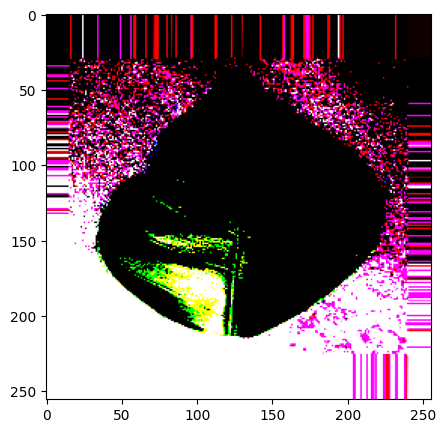

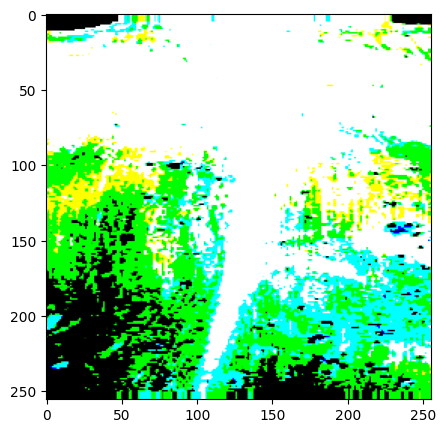

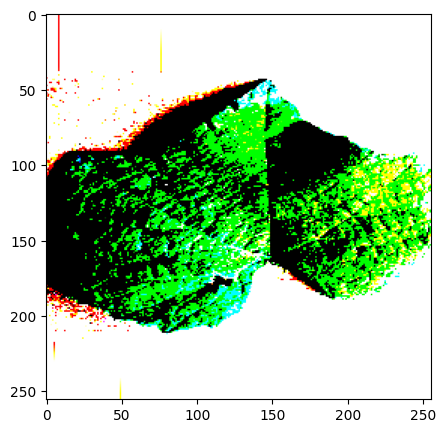

In [85]:
plotImage(t_img[:3],label[:3])

In [86]:
#buliding our model
from keras.layers import Dense,Flatten
from keras.models import Model
import keras
from keras.applications.vgg19 import VGG19

In [87]:
base_model= VGG19(input_shape=(256,256,3),include_top=False)

In [88]:
for layer in base_model.layers:
    layer.trainable = False

In [89]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [90]:
x = Flatten()(base_model.output)
x = Dense(units=13, activation='softmax')(x)

In [91]:
#creating our own model
model = Model(base_model.input , x)

In [92]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [93]:
model.compile(optimizer='adam',loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [94]:
#early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [95]:
#early stopping
es = EarlyStopping(monitor = 'val_accuracy',min_delta=0.01,patience=3, verbose=1)

In [96]:
#model checkpoint
mc = ModelCheckpoint(filepath="best_model.h5",monitor = 'val_accuracy',min_delta=0.01,patience=3, verbose=1,save_best_only=True)

In [97]:
cb=[es,mc]

In [98]:
his = model.fit_generator(train,steps_per_epoch=16, epochs=50,verbose=1, callbacks= cb,validation_data=val, validation_steps=16)

<ipython-input-98-1cefea3f435d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,steps_per_epoch=16, epochs=50,verbose=1, callbacks= cb,validation_data=val, validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 13.2923 - accuracy: 0.5156
Epoch 1: val_accuracy improved from -inf to 0.84570, saving model to best_model.h5
16/16 [==============================] - 14s 825ms/step - loss: 13.2923 - accuracy: 0.5156 - val_loss: 1.9802 - val_accuracy: 0.8457
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 3.7325 - accuracy: 0.7656
Epoch 2: val_accuracy improved from 0.84570 to 0.86523, saving model to best_model.h5
16/16 [==============================] - 13s 812ms/step - loss: 3.7325 - accuracy: 0.7656 - val_loss: 2.4730 - val_accuracy: 0.8652
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 2.9296 - accuracy: 0.8320
Epoch 3: val_accuracy improved from 0.86523 to 0.89648, saving model to best_model.h5
16/16 [==============================] - 13s 822ms/step - loss: 2.9296 - accuracy: 0.8320 - val_loss: 1.4915 - val_accuracy: 0.8965
Epoch 4/50
16/16 [==============================] - ETA: 0s - los

In [99]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

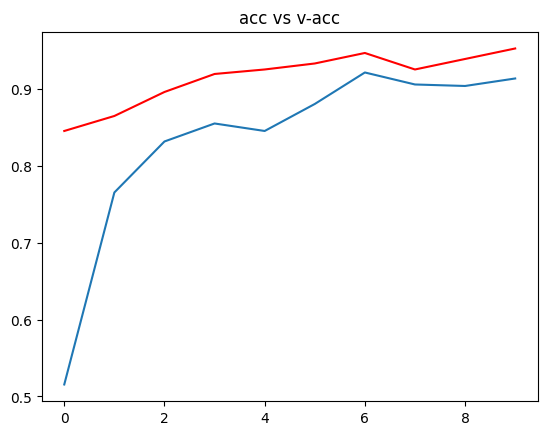

In [100]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title("acc vs v-acc")
plt.show()

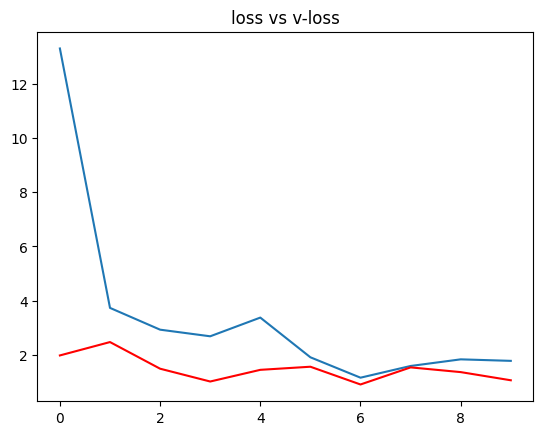

In [101]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title("loss vs v-loss")
plt.show()

In [102]:
#load best model
from keras.models import load_model
model=load_model("best_model.h5")

In [103]:
acc= model.evaluate_generator(val)[1]
print(f"The accuracy of your model is = {acc*100} %")

<ipython-input-103-9e34f8c49f3a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc= model.evaluate_generator(val)[1]


The accuracy of your model is = 94.4491446018219 %


In [105]:
def prediction(path):
    img = load_img(path, target_size=(256,256))
    i = img_to_array(img)
    im= preprocess_input(i)
    img = np.expand_dims(im,axis=0)
    pred = np.argmax(model.predict(img))
    print(f" The image belongs to {ref[pred]}")

In [109]:
path="/content/image data/test/tomato mosaic virus/006e354b-c054-4b72-a83c-e3feb038942e___PSU_CG 2330.JPG"
prediction(path)

1/1 [==============================] - 0s 21ms/step
 The image belongs to tomato


In [108]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))